# KNN Classification Regression

In [31]:
#Import Statements
import numpy as np 
import pandas as pd 
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()
df.tail()
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()

columns_to_drop = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']
for col in columns_to_drop:
    if col in df.columns:
        df.pop(col)  # Pop removes the column
        print(f"'{col}' column has been removed.")
    else:
        print(f"'{col}' column does not exist in the dataframe.")
        
print(df.info)

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0
df['No-show'] = label_encoder.fit_transform(df['No-show'])  # No = 0, Yes = 1


print(df.info)

'PatientId' column does not exist in the dataframe.
'AppointmentID' column does not exist in the dataframe.
'ScheduledDay' column does not exist in the dataframe.
'AppointmentDay' column does not exist in the dataframe.
'Neighbourhood' column does not exist in the dataframe.
<bound method DataFrame.info of         Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0            0   62            0             1         0           0        0   
1            1   56            0             0         0           0        0   
2            0   62            0             0         0           0        0   
3            0    8            0             0         0           0        0   
4            0   56            0             1         1           0        0   
...        ...  ...          ...           ...       ...         ...      ...   
110522       0   56            0             0         0           0        0   
110523       0   51            0            

In [38]:
X = df.drop('No-show', axis=1)
y = df['No-show']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5)
knn

KNeighborsClassifier()

In [41]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#check the accuracy 
print(f"Accuracy :{knn.score(X_test,y_test)}")


Test set predictions: [0 0 0 ... 0 0 0]
Accuracy :0.7713882455124493


## Discussion 
The following is a KNN model used to predict patient attacndeance.The model is trained with the eafult number of n_neighbours(5).Inorder to enhance this model performance, scaling the data using StandardScaler function is required .This also helps in ensuring that all system features are using the same scale.Secondly through  the measurement of the which hyperparameter for n_neighbors will produce a high accuracy, we are able to find the optimal number for the model.


# Concrete Dataset

In [48]:
pip install xlrd>=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
df2 = pd.read_excel('Concrete_Data.xlsx')

df2.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
X = df2.iloc[:, :-1]

y = df2.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

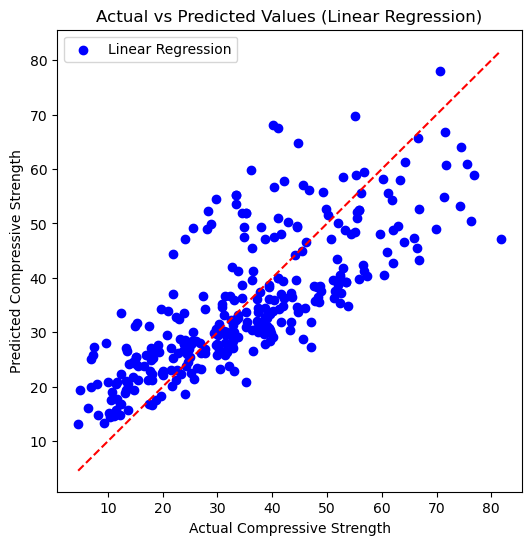

In [7]:
import matplotlib.pyplot as plt

# Plot for Linear Regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.legend()
plt.show()

## Discussion 
The following is a simple linear regression mmode that can be used to get the comprehensive strength of concrete. It assumes a linear relationship between the features of the data and the target, which may not be true in real world scenarios as other factos come into play(Underfitting).Seccondly there are many outliers which come inot play this leads to inaccurate predictions.
However the model can be improved upon by introducing a model like Random Forest which is capable of capturing more relationships that between certain features